In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from xgboost import to_graphviz
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Auto.csv")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
df.shape

(397, 9)

In [6]:
df['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [7]:
df['name'].nunique()

304

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [9]:
np.mean(df.horsepower)

104.46938775510205

In [10]:
df.horsepower.fillna(104,inplace=True)

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

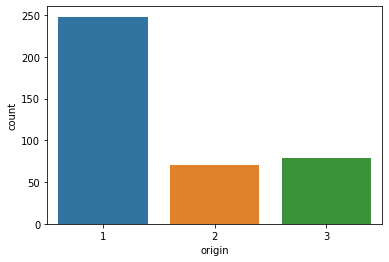

In [12]:
sns.countplot(x=df.origin,data=df)
plt.show()

In [13]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.771549,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.839811,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.893935,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.771549,0.839811,0.893935,1.000000,0.860685,-0.687102,-0.413072,-0.453928
weight,-0.831739,0.897017,0.933104,0.860685,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687102,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413072,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453928,-0.581265,0.210084,0.184314,1.000000


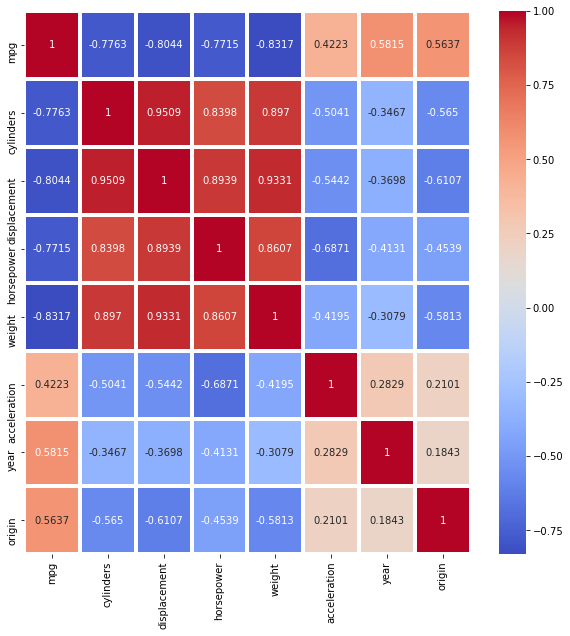

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=3)
plt.show()

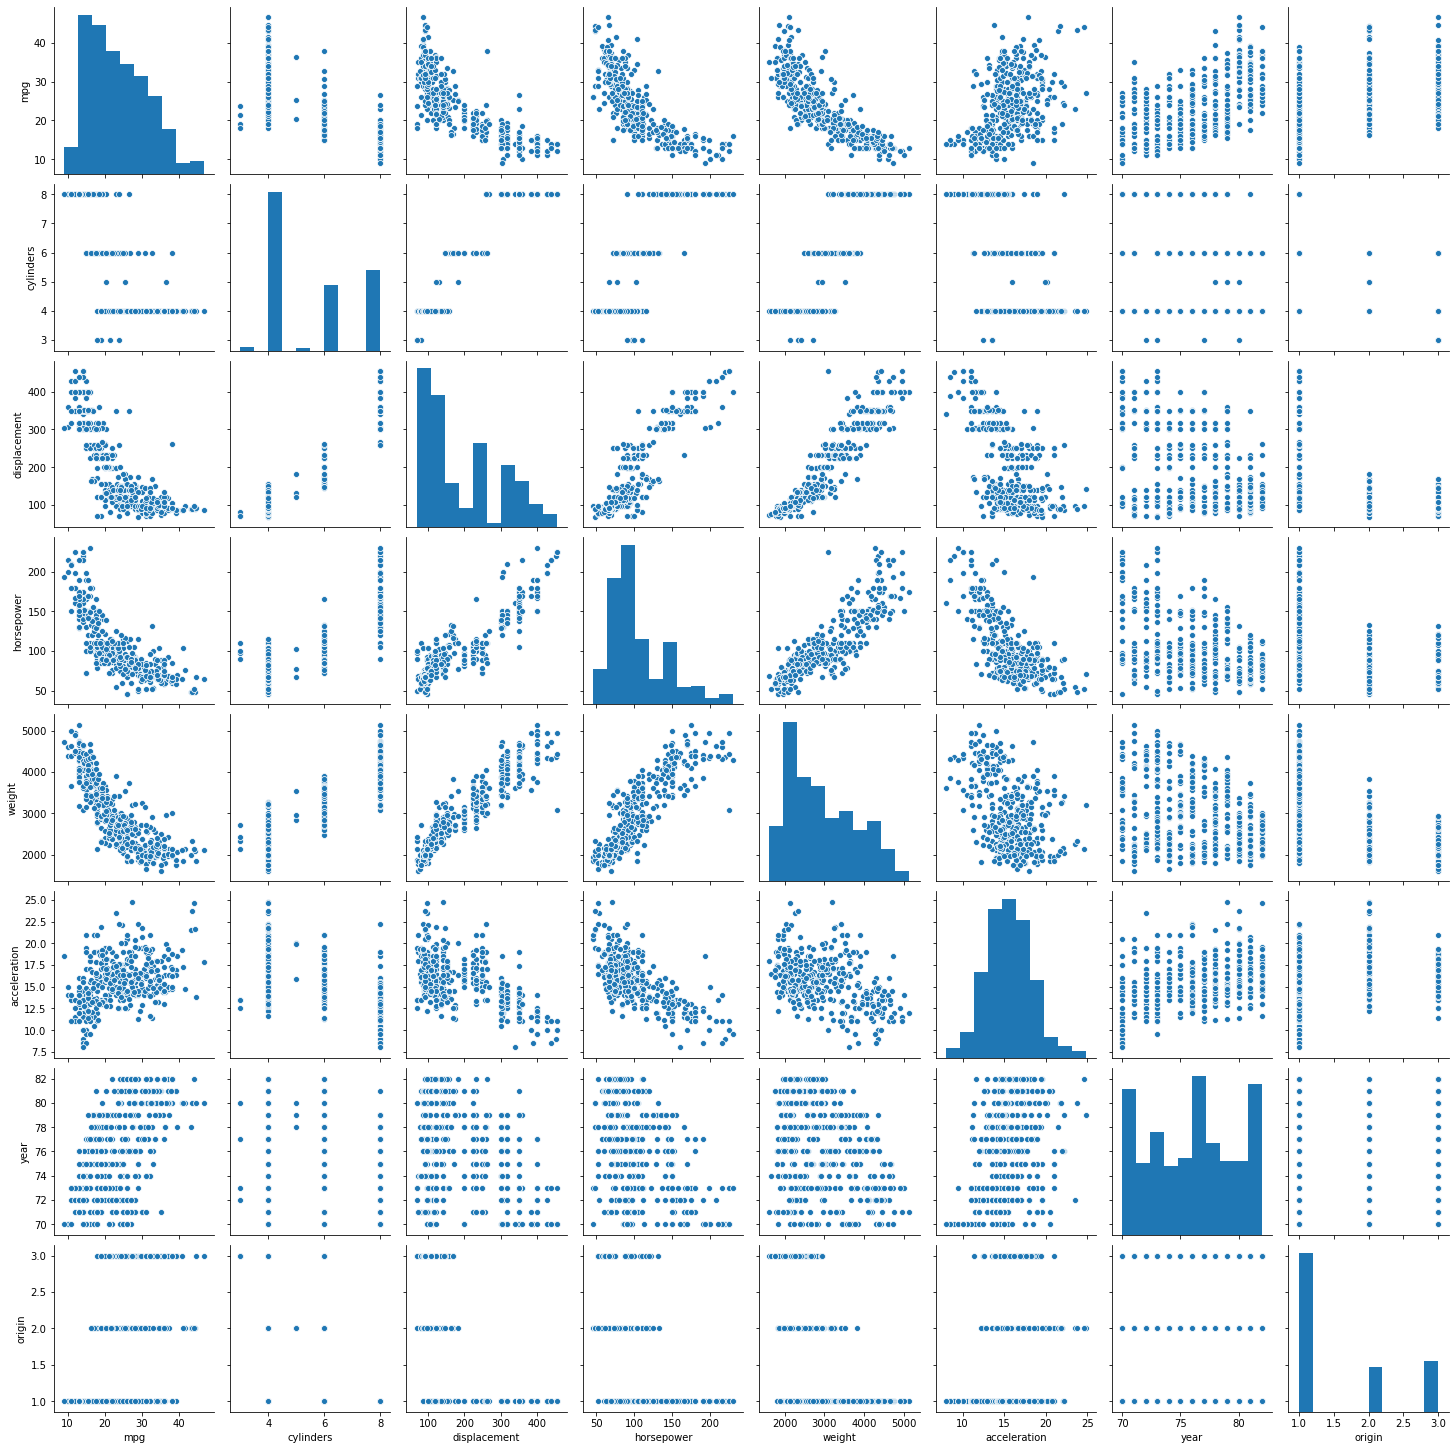

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
df.drop(["name"],axis=1,inplace=True)

In [17]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


In [18]:
df.shape

(397, 8)

In [19]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [20]:
X.values, y.values

(array([[  18. ,    8. ,  307. , ..., 3504. ,   12. ,   70. ],
        [  15. ,    8. ,  350. , ..., 3693. ,   11.5,   70. ],
        [  18. ,    8. ,  318. , ..., 3436. ,   11. ,   70. ],
        ...,
        [  32. ,    4. ,  135. , ..., 2295. ,   11.6,   82. ],
        [  28. ,    4. ,  120. , ..., 2625. ,   18.6,   82. ],
        [  31. ,    4. ,  119. , ..., 2720. ,   19.4,   82. ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
        3, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 3,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2,
        1, 2, 2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, X_test.shape

((317, 7), (80, 7))

In [23]:
xgbmodel = XGBClassifier(objective='multi:softmax',random_state=0,n_estimators=200)

In [24]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=10,eval_metric='merror')

[0]	validation_0-merror:0.2125
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.2
[2]	validation_0-merror:0.225
[3]	validation_0-merror:0.225
[4]	validation_0-merror:0.2
[5]	validation_0-merror:0.2125
[6]	validation_0-merror:0.2
[7]	validation_0-merror:0.2
[8]	validation_0-merror:0.2
[9]	validation_0-merror:0.2
[10]	validation_0-merror:0.2
[11]	validation_0-merror:0.175
[12]	validation_0-merror:0.175
[13]	validation_0-merror:0.175
[14]	validation_0-merror:0.1625
[15]	validation_0-merror:0.1625
[16]	validation_0-merror:0.15
[17]	validation_0-merror:0.15
[18]	validation_0-merror:0.1625
[19]	validation_0-merror:0.1625
[20]	validation_0-merror:0.15
[21]	validation_0-merror:0.15
[22]	validation_0-merror:0.15
[23]	validation_0-merror:0.15
[24]	validation_0-merror:0.15
[25]	validation_0-merror:0.15
[26]	validation_0-merror:0.15
Stopping. Best iteration:
[16]	validation_0-merror:0.15



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
y_pred = xgbmodel.predict(X_test)

In [26]:
y_pred

array([1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2,
       3, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1], dtype=int64)

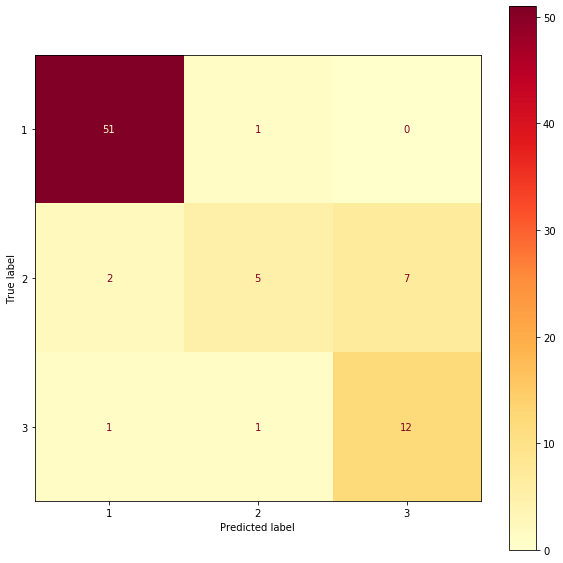

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(xgbmodel,X_test,y_test,cmap="YlOrRd",ax=ax)
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96        52
           2       0.71      0.36      0.48        14
           3       0.63      0.86      0.73        14

    accuracy                           0.85        80
   macro avg       0.76      0.73      0.72        80
weighted avg       0.85      0.85      0.84        80



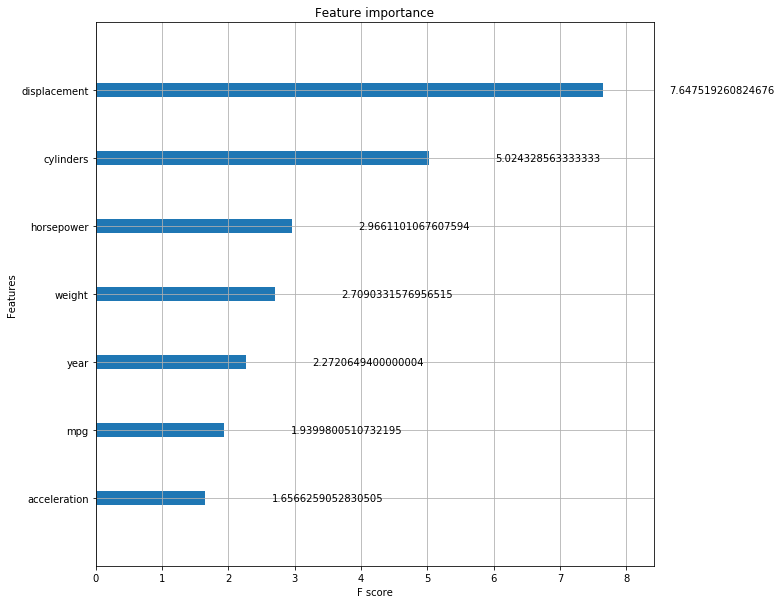

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbmodel,ax=ax,importance_type='gain')
plt.show()